## Motivation
Familiarize with pytorch framework

## Goal

## Scenario

## Intuition

## Notebook

In [2]:
!pip install torch

In [71]:
## Import Libraries
import time

import numpy as np
import pandas as pd
from tqdm import tqdm

import missingno as msno


import torch
from torch import nn

import seaborn as sns
import altair as alt

from sklearn.model_selection import train_test_split


In [72]:
## Import Data

df = pd.read_csv('./data/laptop_price.csv', encoding = "ISO-8859-1")

<AxesSubplot:>

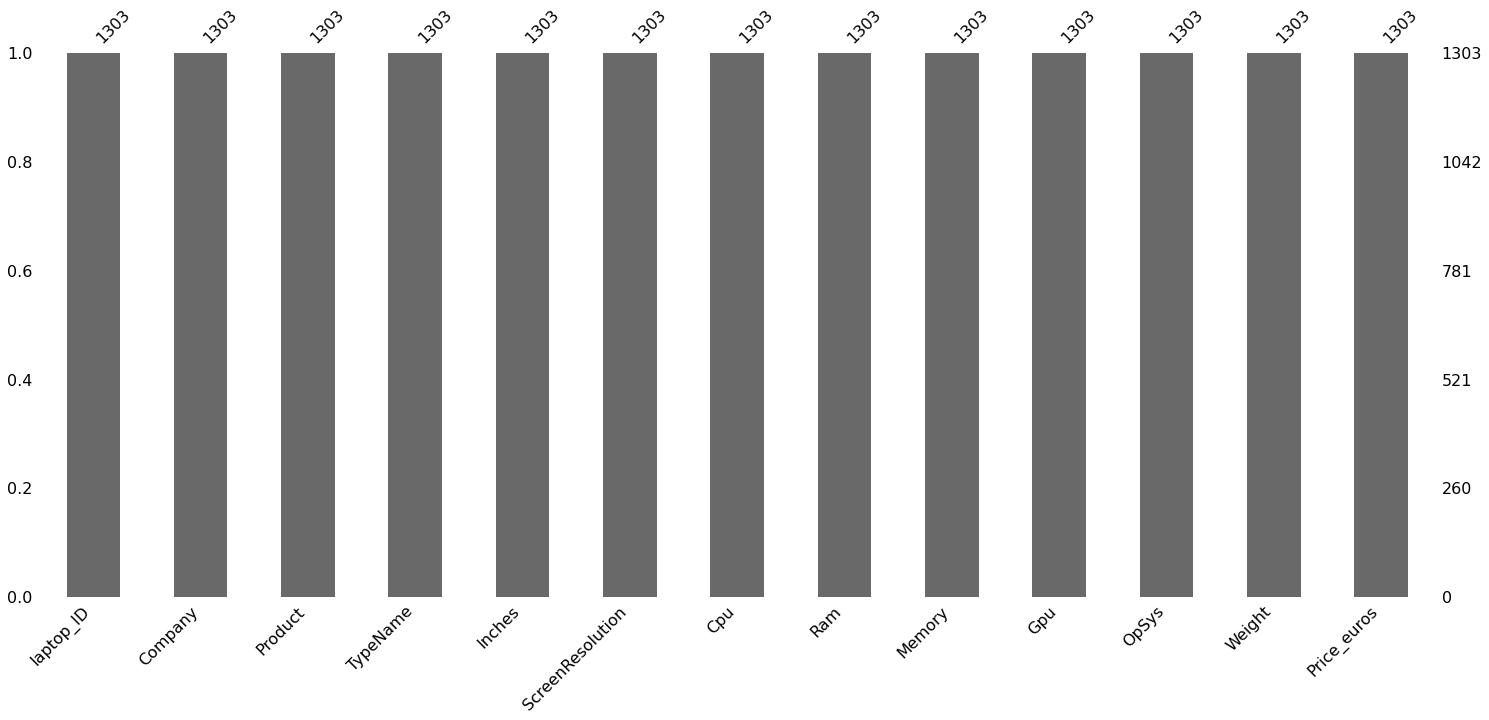

In [73]:
msno.bar(df)


In [26]:
## Pre-Process Data

df['Weight'] = df['Weight'].apply(lambda x: x[:-2]).astype(float)
# df['Weight'].astype(float)

df['Ram'] = df['Ram'].apply(lambda x: x[:-2]).astype(float)


In [6]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [7]:
df['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

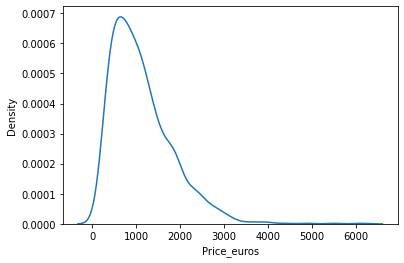

In [8]:
sns.kdeplot(df['Price_euros'])

In [9]:
alt.Chart(df).mark_bar().encode(
    x= alt.X('Company:N', sort = '-y'),
    y='mean(Price_euros):Q'
)

alt.Chart(...)

In [10]:
## Feature Selection

In [68]:
features = ['Inches','Ram', 'Weight']

## Split Data
X_train, X_test, y_train, y_test = train_test_split(np.array(df[features]), np.array(df['Price_euros']).reshape(-1,1), train_size=0.7, shuffle=True)

X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [62]:
## Model Architecture

class MLP(nn.Module):
    def __init__(self,num_inputs=3,num_outputs=1,num_hiddens=64):
        super(MLP, self).__init__()

        self.fc1   = nn.Linear(in_features=num_inputs, out_features= num_hiddens)
        self.relu1 = nn.ReLU()
        self.fc2   = nn.Linear(in_features= num_hiddens, out_features= num_outputs) 
        
    def forward(self, X):

        # X = torch.reshape(X, (X.size()[0],X.size()[2]*X.size()[3]))
        X = self.fc1(X)
        X = self.relu1(X)
        X = self.fc2(X)
        
        return X
        

In [65]:
# training parameters
n_epochs = 25   # number of epochs to run
batch_size = 50  # size of each batch
loss_function = nn.MSELoss()
lrs=[5e-2, 1e-1, 5e-1]

In [66]:
import torch.optim as optim

loss_best = 0.0
current_best=0.0
best_model= None

for lr in lrs:

    model = MLP()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    correct = 0
    for i in range(n_epochs): #

        model.train()
        #model.eval()
        for i in range(0,len(X_train), batch_size):
   
            #raise NotImplementedError()
            pred = model(X_train[i:i+batch_size]) 

            loss = loss_function(pred, y_train[i:i+batch_size])

            # Backpropagation
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step() 




In [70]:
X_test

tensor([[17.3000, 16.0000,  3.2000],
        [15.6000,  8.0000,  2.2000],
        [15.6000,  4.0000,  2.3100],
        ...,
        [15.6000,  4.0000,  1.8600],
        [13.3000,  8.0000,  1.2000],
        [14.0000,  8.0000,  1.6000]])

In [69]:
## Evaluate Loss:

model(X_test) 

tensor([[1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028.5342],
        [1028

Conclusion: 

Research/References:
- Data Source:
    - https://www.kaggle.com/datasets/muhammetvarl/laptop-price?datasetId=957775
- Samples:
    - https://machinelearningmastery.com/building-a-regression-model-in-pytorch/
- Visualizations:
    - https://datatofish.com/convert-string-to-float-dataframe/
- Misc:
    - https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html
    - https://github.com/Bjarten/early-stopping-pytorch/blob/master/MNIST_Early_Stopping_example.ipynb
    - https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
    
    